In [26]:
import nltk
from nltk.corpus import stopwords

# sentiment analysis  (if not found: pip install vaderSentiment at command prompt)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pattern.en import sentiment

from nltk.stem import WordNetLemmatizer

from nltk import FreqDist, word_tokenize

from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def vader_sentiment_categorized(texts):
        #initialize vader analyzer
    analyzer = SentimentIntensityAnalyzer()

    #lists of positive, negative, and neutral reviews
    positive_vader_review = []
    negative_vader_review = []
    neutral_vader_review = []

    #loop through reviews and add to appropriate list
    for sentence in texts:
        vs = analyzer.polarity_scores(sentence)
        if vs["compound"] >= 0.1:
            positive_vader_review.append(sentence)
        elif vs["compound"] <= -0.1:
            negative_vader_review.append(sentence)
        else:
            neutral_vader_review.append(sentence)
    return positive_vader_review, negative_vader_review, neutral_vader_review

lists = ["This stock sucks. Never buying it again. Lost me lots of money.", "Awesome stock. Took it to the moon and made a shit ton of money off of it.",
        "Still waiting on this stock to pan out. Buying and holding for life. Hopefully it does well"]

pos, neg, neu = vader_sentiment_categorized(lists)
print(len(pos))
print(len(neg))
print(len(neu))

2
1
0


In [12]:
def vader_overall(texts):
    analyzer = SentimentIntensityAnalyzer()
    sum = 0
    for sentence in texts:
        vs = analyzer.polarity_scores(sentence)
        sum += vs["compound"]
    return sum / len(texts)

print(vader_overall(lists))

0.042666666666666665


In [25]:
def popular_words(documents):
    texts = [[word for word in document.lower().split()] for document in documents]
    texts = [x for y in texts for x in y]
    wordnet_lemmatizer = WordNetLemmatizer()
    texts = (wordnet_lemmatizer.lemmatize(word) for word in texts)
    fdist = nltk.FreqDist(texts)
    print(fdist.most_common(5))
    
popular_words(lists)

[('it', 3), ('of', 3), ('this', 2), ('stock', 2), ('buying', 2)]


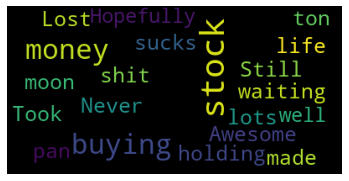

In [28]:
def make_wordcloud(texts):
    texts = str(texts)
    texts = texts.replace("'", '')

    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(texts)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")

make_wordcloud(lists)